In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [2]:
# Training set
X_train = pd.read_csv("data/ciriello_brca_filtered.csv")
X_train = X_train[X_train.Ciriello_subtype != "Normal"]
labels = X_train["Ciriello_subtype"]

X_train.drop(['Ciriello_subtype'], axis="columns", inplace=True)

In [3]:
variance = X_train.var(axis=0).sort_values(ascending=False)[:5000]
X_brca_variant = X_train[variance.index.values]

In [4]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_brca_variant)

In [5]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, labels], axis="columns")

In [6]:
import matplotlib.pyplot as plt

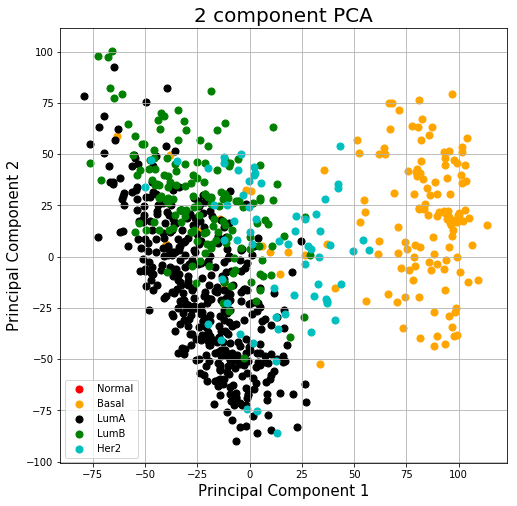

In [7]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Normal', 'Basal', 'LumA', 'LumB', 'Her2']
colors = ['r', 'orange', 'k', 'g', 'c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Ciriello_subtype'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()